# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 8

### Zadanie 1

1. Wczytaj plik `mieszkania.csv` za pomocą jednej z poniższych bibliotek:
   - [`pandas`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) – funkcja `read_csv`,
   - [`numpy`](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html) – funkcja `genfromtxt`,
   - [`csv`](https://docs.python.org/3/library/csv.html) – funkcja `reader`.

2. Usuń nieprawidłowe dane, np. wiersze zawierające wartość `-` lub cenę równą `0`.

3. Zamień wartości liczbowe zapisane jako tekst na odpowiedni typ liczbowy.

4. Przedstaw **funkcję masy prawdopodobieństwa** wartości mieszkań w zależności od rodzaju *transakcji rynkowej*.  
   **Podpowiedź:** Skorzystaj z funkcji `displot` z biblioteki `seaborn` (jeśli nie masz biblioteki, zainstaluj ją poleceniem `pip install seaborn`).  
   Zwróć uwagę na argumenty: `x`, `hue`, `kind`, `fill`.

5. Wyświetl wszystkie trzy funkcje (dla ogółu, rynku pierwotnego i wtórnego) na jednym wykresie.

6. Zinterpretuj wyniki.

---

#### Informacje o zbiorze danych

- Dane dotyczą sprzedaży oraz cen nieruchomości i pochodzą z Głównego Urzędu Statystycznego (GUS), opracowane na podstawie danych z Rejestru Cen Nieruchomości (RCN), a do 31 lipca 2021 – z Rejestru Cen i Wartości Nieruchomości (RCiWN), prowadzonego przez starostwa powiatowe i prezydentów miast na prawach powiatu. Dane pochodzą z aktów notarialnych.
- Uwzględniono wyłącznie transakcje kupna/sprzedaży lokali mieszkalnych w budynkach wielorodzinnych (nie dotyczy domów jednorodzinnych), które miały miejsce w analizowanym okresie i zostały zarejestrowane w RCN przed datą przekazania danych do GUS.
- Dane dotyczą wyłącznie transakcji rynkowych, tj. sprzedaży na wolnym rynku (z wyłączeniem np. sprzedaży między osobami spokrewnionymi) oraz sprzedaży przetargowej.
- Podział na rynek pierwotny i wtórny:
  - **Rynek pierwotny**: sprzedaż na wolnym rynku przez osoby prawne, gdzie średnia cena 1 m² wynosi co najmniej 2 000 zł.
  - **Rynek wtórny**: pozostałe transakcje rynkowe, w tym sprzedaż przetargowa.
- W grudniu 2021 roku uzupełniono bazę BDL o dane za lata 2010–2014, obejmujące większą liczbę transakcji niż wcześniej publikowane dane.
- Brak danych od 2020 roku dla miasta Koszalin oraz częściowe braki dla Szczecina.

#### Oznaczenia w danych:

- `-` – brak informacji z powodu zmiany poziomu prezentacji, zmian w jednostkach terytorialnych lub cechach raportu,
- `n` – dane jeszcze niedostępne,
- `x` – brak informacji z powodu tajemnicy statystycznej lub niecelowości wypełnienia,
- `X` – brak danych ze względu na zmiany metodologiczne lub tajemnicę statystyczną.


['Kod', 'Nazwa', 'Transakcje rynkowe', 'Powierzchnia użytkowa lokali mieszkalnych', 'Rok', 'Wartosc', 'Jednostka miary', 'Atrybut']
Dlugosc csv: 71460


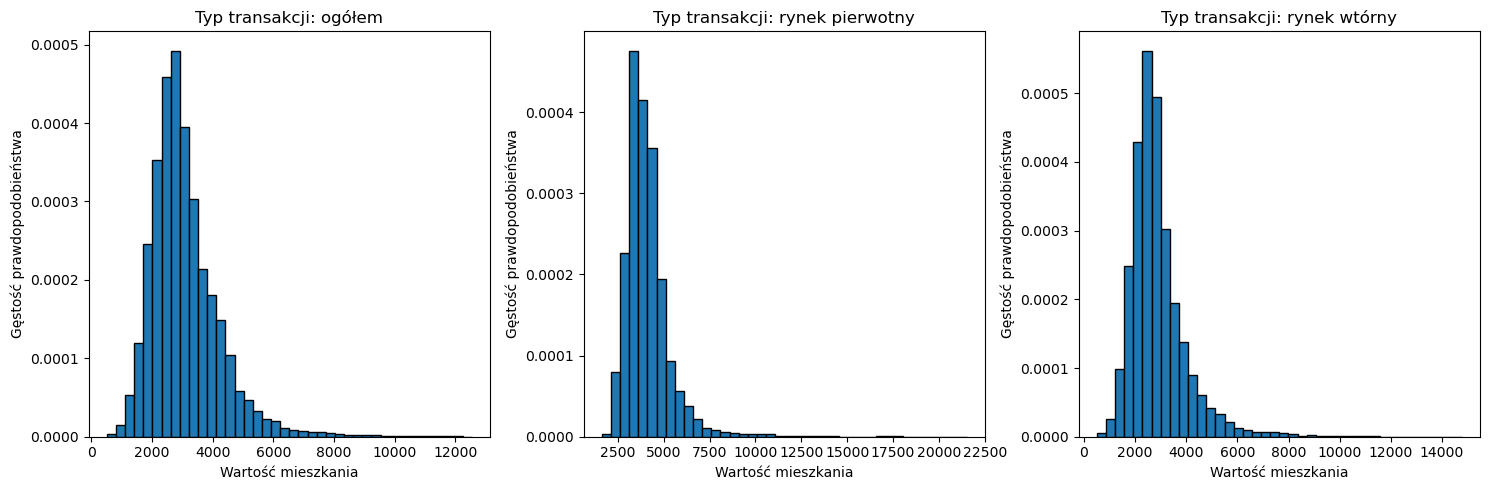

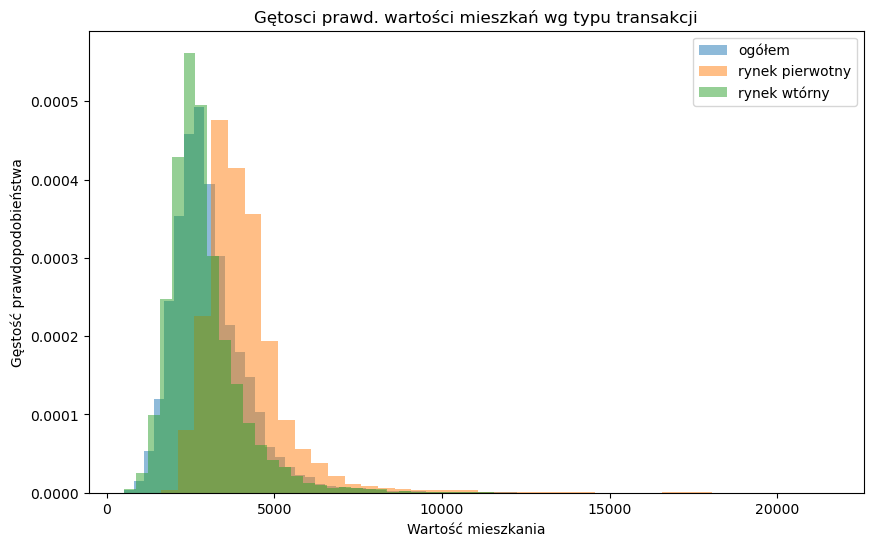

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#1 
#Wczytaj plit

#on bad lines skip - byl duzy problem przy wczytaniu danych. Nie wiem dlaczego. Po ręcznej inspekcji csv dane były też zakodowane w dziwny sposób. 
#Możliwy jakiś błąd przy kodowaniu lub coś czego nie rozumiem.
df = pd.read_csv('mieszkania.csv', sep = ";")

print(df.columns.tolist())
print("Dlugosc csv:",len(df))

#2
#Usuń nieprawidłowe dane, np. wiersze zawierające wartość - lub cenę równą 0.
binary_mask = df.isin(['0', '-'])
row_mask = ~binary_mask.any(axis=1)
df = df[row_mask]

#3
#Zamień wartości liczbowe zapisane jako tekst na odpowiedni typ liczbowy.
df["Wartosc"] = df["Wartosc"].astype(float)

#4
#Przedstaw funkcję masy prawdopodobieństwa wartości mieszkań w zależności od rodzaju transakcji rynkowej.

types = np.unique(df["Transakcje rynkowe"]).tolist()

plt.figure(figsize=(15, 5))

for i, typ in enumerate(types):
    x = df.loc[df["Transakcje rynkowe"] == typ, "Wartosc"]

    plt.subplot(1, len(types), i + 1)
    plt.title(f"Typ transakcji: {typ}")
    plt.hist(x, bins=40, density=True, edgecolor='black')
    plt.xlabel("Wartość mieszkania")
    plt.ylabel("Gęstość prawdopodobieństwa")

plt.tight_layout()
plt.show()

#5
#Wyświetl wszystkie trzy funkcje (dla ogółu, rynku pierwotnego i wtórnego) na jednym wykresie.

types = np.unique(df["Transakcje rynkowe"]).tolist()

plt.figure(figsize=(10, 6))
for typ in types:
    x = df.loc[df["Transakcje rynkowe"] == typ, "Wartosc"]
    plt.hist(
        x,
        bins=40,
        density=True,
        alpha=0.5,
        label=typ,
    )

plt.title("Gętosci prawd. wartości mieszkań wg typu transakcji")
plt.xlabel("Wartość mieszkania")
plt.ylabel("Gęstość prawdopodobieństwa")
plt.legend()
plt.show()


#6
#Zinterpretuj wyniki.

#Na rynku wtornym transakcje są srednio tansze  (mniej za m2) niz na rynku pierwotnym
#Widac tez bardziej rownomierny rozklad na rynku wtornym niz na pierwotnym, gdzie widocznych jest kilka outlierow z cena
#Oscylujaca okolo 17,5 k/m2. W rynku wtornym takie zjawisko nie wystepuje

#Mimo to rozklady sa do siebie podobne i pokazuja podobny trend i zaleznosc. Mieszkania z rynku wtornego maja najwieksza sprzedaz 
#w okolicach 2,4 k a te z pierwotnego w 3,5k. Poza tym sa tylko przesuniete.

### Zadanie 2 (kontynuacja poprzedniego)

1. Wyświetl dystrybuantę (empiryczną funkcję rozkładu) wartości mieszkań dla rodzaju transakcji `ogólny`.  
   **Podpowiedź:** Skorzystaj z funkcji `ecdfplot` z biblioteki `seaborn`.

2. Na podstawie wykresu oszacuj, jaki procent mieszkań sprzedawanych jest poniżej ceny 4 000 zł za m².


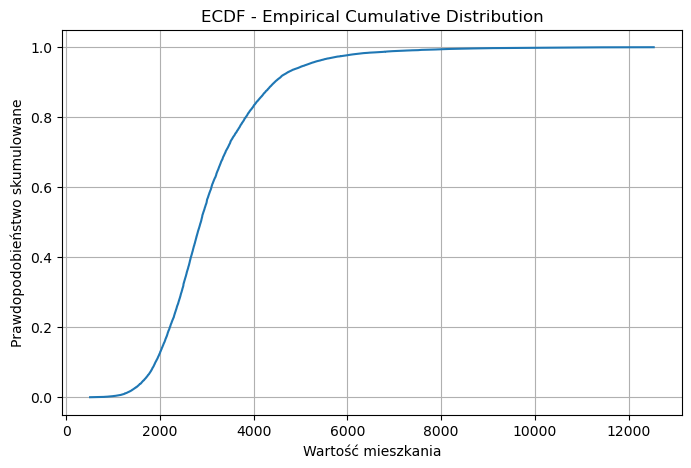

In [21]:
x = df.loc[df["Transakcje rynkowe"] == "ogółem", "Wartosc"]
x_sorted = np.sort(x)
y = np.arange(1, len(x_sorted)+1) / len(x_sorted)  # ECDF values

plt.figure(figsize=(8, 5))
plt.plot(x_sorted, y)
plt.xlabel("Wartość mieszkania")
plt.ylabel("Prawdopodobieństwo skumulowane")
plt.title("ECDF - Empirical Cumulative Distribution")
plt.grid(True)
plt.show()

### Zadanie 3

Opis zbioru danych znajduje się w pliku `boston.txt`.

1. Wczytaj plik `boston.txt` (zwróć uwagę na jego format).  
   **Podpowiedź:** Skorzystaj z funkcji `read_csv` z biblioteki `pandas`, używając odpowiednich parametrów: `skiprows`, `header`, `sep`.  
   
   > Uwaga: Nie modyfikuj zawartości pliku.

2. Wyświetl funkcję masy prawdopodobieństwa dla cen mieszkań (`MEDV`).

3. Wyświetl funkcję masy prawdopodobieństwa z dwiema zmiennymi: `MEDV` (cena) i `RM` (liczba pokoi).  
   - Dla jakiej ceny i liczby pokoi sprzedaje się najwięcej mieszkań?  
   - Jakie inne informacje można wyczytać z wykresu?

4. Przeanalizuj dowolny dodatkowy atrybut i krótko opisz uzyskane wyniki.


In [26]:
#Wczytanie danych

#Columns
column_names = [
    "CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS",
    "RAD","TAX","PTRATIO","B","LSTAT","MEDV"
]

df_boston = pd.read_csv(
    "boston.txt",
    sep=r"\s+", #Separator is just blank space (in not definet lenght)
    header=None, #No headers, but column names from hardcoded list
    names=column_names,
    skiprows=22  #Skip 22 lines
)

#Pair and un-pair (0,2,4..) (1,3,5...)
even_rows = df_boston.iloc[::2].reset_index(drop=True) #11 kolumn
odd_rows = df_boston.iloc[1::2].reset_index(drop=True) #3 ostatnie kolumny

#Nadpisanie
even_rows.iloc[:, -3:] = odd_rows.iloc[:, :3]

# Rezultat to zmergowane wiersze
df_boston = even_rows
del even_rows, odd_rows
#####################


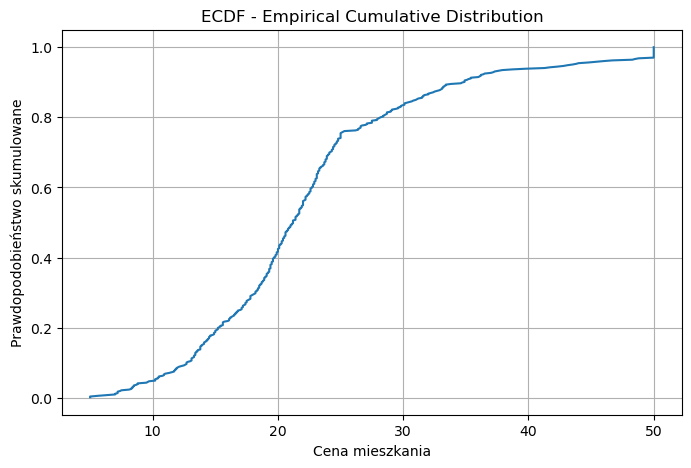

In [27]:
#Wyświetl funkcję masy prawdopodobieństwa dla cen mieszkań (MEDV).
x = df_boston["MEDV"]
x_sorted = np.sort(x)
y = np.arange(1, len(x_sorted)+1) / len(x_sorted)  # ECDF values

plt.figure(figsize=(8, 5))
plt.plot(x_sorted, y)
plt.xlabel("Cena mieszkania")
plt.ylabel("Prawdopodobieństwo skumulowane")
plt.title("ECDF - Empirical Cumulative Distribution")
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

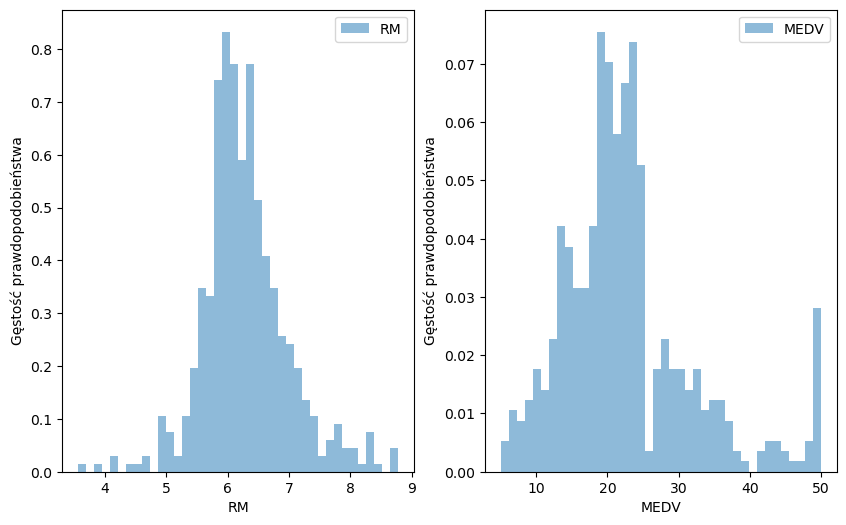

In [40]:
#Wyświetl funkcję masy prawdopodobieństwa z dwiema zmiennymi: MEDV (cena) i RM (liczba pokoi).

#Dla jakiej ceny i liczby pokoi sprzedaje się najwięcej mieszkań?
#Jakie inne informacje można wyczytać z wykresu?

# Dane
types = ["RM", "MEDV"]
plt.suptitle("Gętosci prawd. Ceny mieszkania i ilosci pokoi")
plt.figure(figsize=(10, 6))
for i, typ in enumerate(types):
    plt.subplot(1,len(types),i+1)
    x = df[typ]
    plt.hist(
        x,
        bins=40,
        density=True,
        alpha=0.5,
        label=typ,
    )
    plt.ylabel("Gęstość prawdopodobieństwa")
    plt.legend()
    plt.xlabel(typ)


plt.show()

In [ ]:
#Z wykresu wynika ze najwiecej mieszkan sprzedaje sie w cenie od 15 do 25 MEDV, i jest to dosc staly rozklad. Duzy pik nastepuje tez
#przy najwiekszej wartosci mieszkan w okolicach 50 - mieszkania luksusowe (jesli ktos kupuje to juz najdrozsze a nie takie za np. 45)

#W przypadku ilosci pokoi wystepuje gausowski rozklad i najwiecej mieszkan sprzedaje sie z 6 pokojami, choc wystepuje lekki przechyl i tendencja 
#do wyboru mieszkan z wieksza iloscia pokoi

#Mozemy wyczytac ze po cenie 25 nastepuje gwaltowny spadek ilosci zakupionych mieszkan, a nastepnie spadaja one bardziej lagodnie.
#Potem jak juz zostalo wspomniane najdrozsze mieszkania sprzedaja sie na wzglednie wysokim poziomie  (w porownaniu do tych nieco tanszych od nich)

<Figure size 640x480 with 0 Axes>

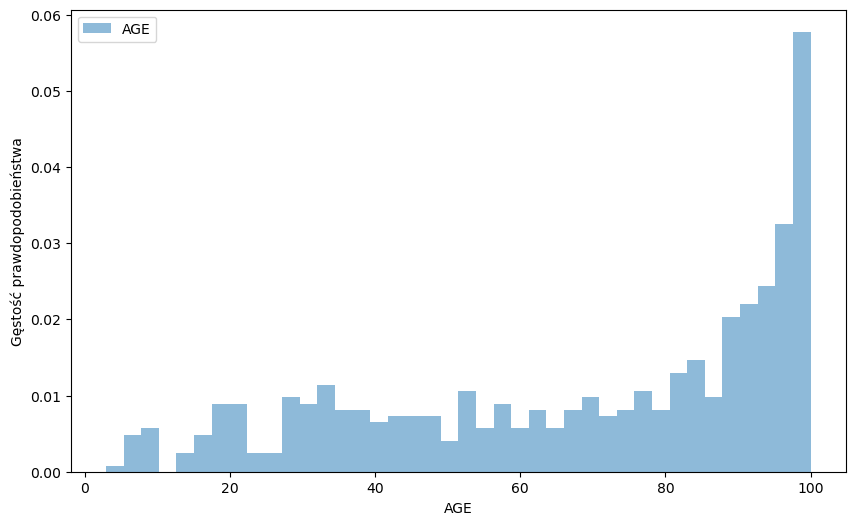

In [41]:
#Przeanalizuj dowolny dodatkowy atrybut i krótko opisz uzyskane wyniki.
# Dane
types = ["AGE"]
plt.suptitle("Gętosci prawd. Ceny mieszkania i ilosci pokoi")
plt.figure(figsize=(10, 6))
for i, typ in enumerate(types):
    plt.subplot(1,len(types),i+1)
    x = df[typ]
    plt.hist(
        x,
        bins=40,
        density=True,
        alpha=0.5,
        label=typ,
    )
    plt.ylabel("Gęstość prawdopodobieństwa")
    plt.legend()
    plt.xlabel(typ)


plt.show()

In [42]:
# W przypadku mieszkan wystepuje tendencja taka, ze mieszkania "młode", swiezo wybudowane sa sprzedawane na podobnym poziomie co te starsze.
#Zaleznosc ta zmienia sie przy osiagnieciu wieku mieszkania ok. 70-75 lat. Potem nastepuje wzrost sprzedazy takich mieszkan i ich ogolnego obrotu. 
#Moze to sugerowac ze swiezo wybudowane mieszkania sa rzadziej sprzedawane niz te starsze.